In [65]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"

1.13.0


In [66]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = X * weight + bias
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [67]:
train_split = int(0.8 * len(X))
x_train,y_train = X[:train_split], y[:train_split]
x_test,y_test = X[train_split:],y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [68]:
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,label = 'train data')
    plt.scatter(test_data,test_labels,label = 'test_data')
    plt.scatter(test_data,predictions,label = 'predictions') if predictions is not None else print()
    plt.legend()


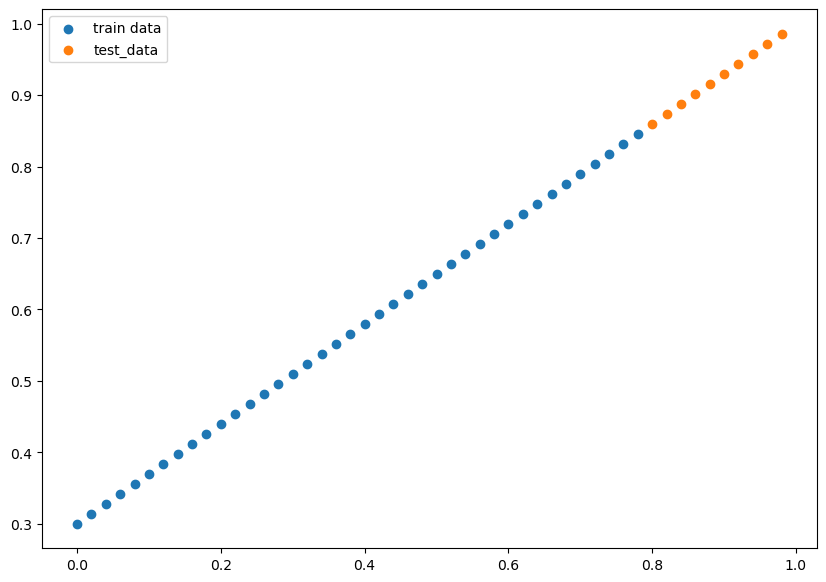

In [69]:
plot_predictions(x_train,y_train,x_test,y_test,None)

In [70]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + bias



In [71]:
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [72]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [73]:
with torch.inference_mode():
    y_preds = model0(x_test)
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])


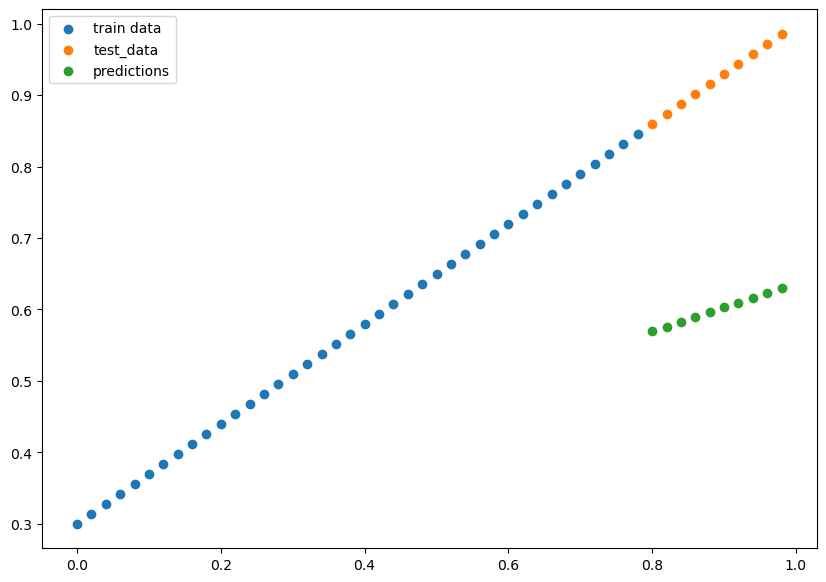

In [74]:
plot_predictions(x_train,y_train,x_test,y_test,predictions=y_preds)

In [75]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(),lr=0.01)

In [76]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.14169074594974518 | MAE Test Loss: 0.3198745846748352 
Epoch: 10 | MAE Train Loss: 0.12648078799247742 | MAE Test Loss: 0.28516465425491333 
Epoch: 20 | MAE Train Loss: 0.11127082258462906 | MAE Test Loss: 0.25045472383499146 
Epoch: 30 | MAE Train Loss: 0.0960608422756195 | MAE Test Loss: 0.21574480831623077 
Epoch: 40 | MAE Train Loss: 0.08085088431835175 | MAE Test Loss: 0.1810348629951477 
Epoch: 50 | MAE Train Loss: 0.06564091145992279 | MAE Test Loss: 0.14632496237754822 
Epoch: 60 | MAE Train Loss: 0.050430942326784134 | MAE Test Loss: 0.11161501705646515 
Epoch: 70 | MAE Train Loss: 0.035220976918935776 | MAE Test Loss: 0.07690508663654327 
Epoch: 80 | MAE Train Loss: 0.02001100964844227 | MAE Test Loss: 0.04219517856836319 
Epoch: 90 | MAE Train Loss: 0.004801043774932623 | MAE Test Loss: 0.007485252805054188 


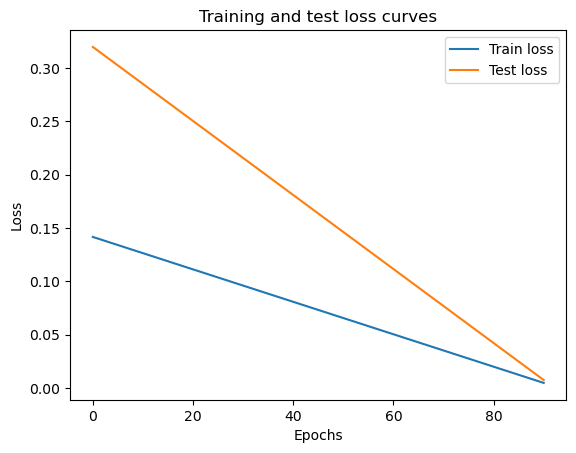

In [77]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])


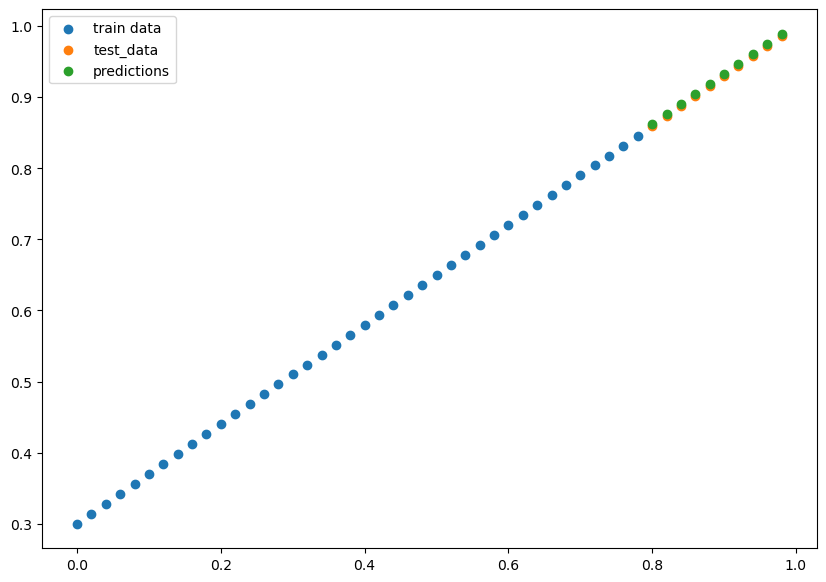

In [78]:
with torch.inference_mode():
    y_preds = model0(x_test)
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")
plot_predictions(x_train,y_train,x_test,y_test,predictions=y_preds)

In [79]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [ ]:
model_1 = LinearRegressionModelV2()
model_1.to(device)
next(model_1.parameters()).device

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)
epoch = 1000
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for ep in range(epoch):
    # train模式
    model_1.train()
    y_pred = model_1(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # eval模式
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred,y_test)
    if ep % 100 == 0:
        print(f"Epoch: {ep} | Train loss: {loss} | Test loss: {test_loss}")
